In [17]:
import pickle
import numpy as np
runs = ["one", "two", "three", "four", "five"]
betas = [0.1, 0.3, 0.5, 10.0, 100.0]
# runs=["three"]
num_runs = 1
f1_scores = np.zeros((5, len(runs), 15))
accuracies = np.zeros((5, len(runs), 15))
train_losses = np.zeros((5, len(runs), 15))
test_losses = np.zeros((5, len(runs), 15))

for j, beta in enumerate(betas):
    for i, run in enumerate(runs):
    # for i in range(1):
        path = f"C:\\Users\\LohithSai\\Desktop\\FederatedImputation\\TheArchive\\global_classifier_experiments\\run_{run}\\results_{beta}"
        # path = f"C:\\Users\\LohithSai\\Desktop\\FederatedImputation\\src\\results\\results_{beta}"
        with open(path, 'rb') as f:
            results_run_one = pickle.load(f)
        f1_scores[j][i] = results_run_one["f1_scores"]
        accuracies[j][i] = results_run_one["accuracies"]
        train_losses[j][i] = results_run_one["train_losses"]
        test_losses[j][i] = results_run_one["test_losses"]
print(np.mean(f1_scores, axis=1)[1])

[0.74954756 0.75673778 0.80420759 0.82669749 0.81103358 0.8390494
 0.81041364 0.83181003 0.8321817  0.83674412 0.82994947 0.82963573
 0.82744633 0.84007501 0.79989533]


In [25]:
import numpy as np
import pickle
betas = [0.1, 0.3, 0.5, 10.0, 100.0]
runs = ["one", "two", "three", "four", "five"]
finetuned_f1_scores = np.zeros((len(runs), len(betas)))

for r, run in enumerate(runs):
    for b, beta in enumerate(betas):
        path = f"C:\\Users\\LohithSai\\Desktop\\FederatedImputation\\TheArchive\\pretrained\\run_{run}\\fedimputed_cvae_0_{beta}_mnist_exq_8_C[1.0]_iid[2]_E[1]_B[10].pkl"
        with open(path, 'rb') as f:
            results_run_one = pickle.load(f)

        finetuned_f1_scores[r][b] = results_run_one[3]


In [29]:
import numpy as np
import pickle
runs = ["one", "two", "three", "four", "five"]
betas = [0.1, 0.3, 0.5, 10.0, 100.0]
federated_f1_scores = np.zeros((len(betas), len(runs)))
for j, beta in enumerate(betas):
    for i, run in enumerate(runs):
        path = f"C:\\Users\\LohithSai\\Desktop\\FederatedImputation\\TheArchive\\imputation_experiments\\run_{run}\\fedimputed_cvae_{0}_{beta}_mnist_exq_15_C[1.0]_iid[2]_E[1]_B[10].pkl"
        with open(path, 'rb') as f:
            results_run_one = pickle.load(f)

        federated_f1_scores[j][i] = results_run_one[3]
print(federated_f1_scores.mean(axis=1))

[0.86666318 0.92415816 0.964057   0.96339359 0.96633729]


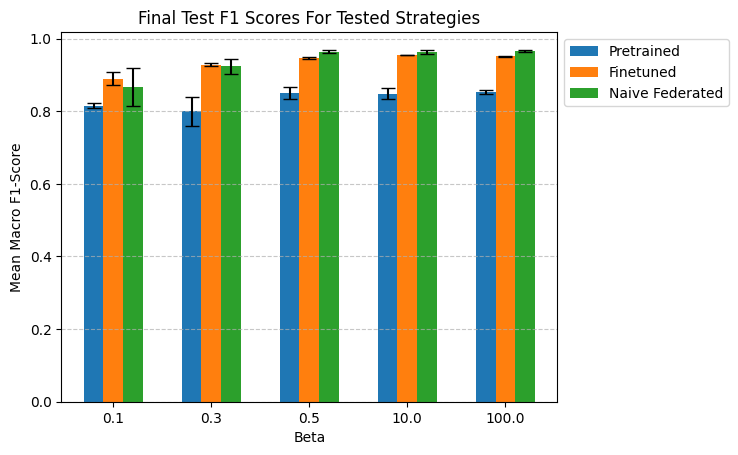

In [35]:
import matplotlib.pyplot as plt
final_f1_scores = f1_scores[:,:,-1]
final_f1_scores.mean(axis=1)

means = final_f1_scores.mean(axis=1)
std_devs = final_f1_scores.std(axis=1)

fed_means = federated_f1_scores.mean(axis=1)
fed_std_devs = federated_f1_scores.std(axis=1)

finetuned_means = finetuned_f1_scores.mean(axis=0)
finetuned_std = finetuned_f1_scores.std(axis=0)

# Define beta values for labeling
betas = [0.1, 0.3, 0.5, 10.0, 100.0]  # Replace with your actual beta values

# Plotting
fig, ax = plt.subplots()

# Number of groups
num_groups = len(means)

# Setting the positions and width for the bars
bar_width = 0.2
x = np.arange(num_groups)  # the label locations

# Plotting the bars
rects1 = ax.bar(x - bar_width, means, bar_width, yerr=std_devs, capsize=5, label='Pretrained')
rects2 = ax.bar(x, finetuned_means, bar_width, yerr=finetuned_std, capsize=5, label='Finetuned')
rects3 = ax.bar(x + bar_width, fed_means, bar_width, yerr=fed_std_devs, capsize=5, label='Naive Federated')


# Adding labels and title
ax.set_xlabel('Beta')
ax.set_ylabel('Mean Macro F1-Score')
ax.set_title('Final Test F1 Scores For Tested Strategies')
ax.set_xticks(x)
ax.set_xticklabels(betas)

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
# Adding grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

(5, 15)


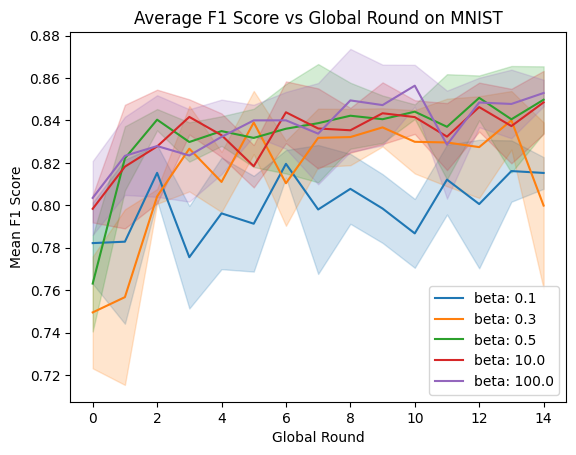

In [46]:
from matplotlib import pyplot as plt

mean_f1_scores = np.mean(f1_scores, axis=1)
std_f1_scores = np.std(f1_scores, axis=1)
print(mean_f1_scores.shape)

for i, beta in enumerate(betas):
    line,  = plt.plot(mean_f1_scores[i], label=f'beta: {beta}')
    color = line.get_color()
    # Plot the shaded area for the standard deviation
    plt.fill_between(
        np.arange(mean_f1_scores.shape[1]),
        mean_f1_scores[i] - std_f1_scores[i],
        mean_f1_scores[i] + std_f1_scores[i],
        color=color, alpha=0.2
    )

plt.title("Average F1 Score vs Global Round on MNIST")
plt.xlabel('Global Round')
plt.ylabel('Mean F1 Score')
plt.legend()
plt.show()

(5, 15)


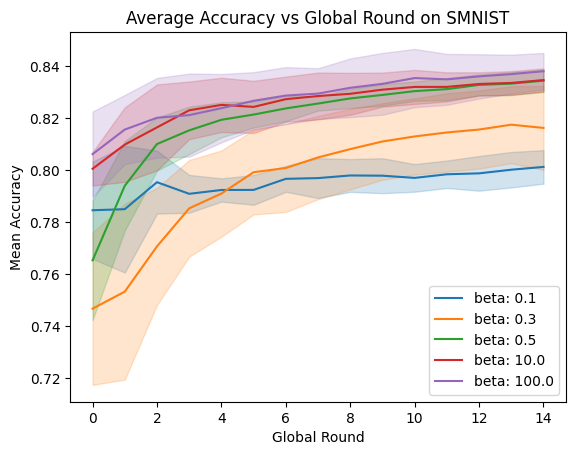

In [51]:
# from matplotlib import pyplot as plt
#
# mean_accuracy_scores = np.mean(accuracies, axis=1)
# std_accuracy_scores = np.std(accuracies, axis=1)
#
# plt.plot(mean_accuracy_scores)
#
# # Plot the shaded area for the standard deviation
# plt.fill_between(
#     np.arange(mean_accuracy_scores.shape[0]),
#     mean_accuracy_scores - std_accuracy_scores,
#     mean_accuracy_scores + std_accuracy_scores,
#     color='b', alpha=0.2
# )
#
# plt.title("Average Accuracy vs Global Round on MNIST")
# plt.xlabel('Global Round')
# plt.ylabel('Mean Accuracy')
#
# plt.show()

from matplotlib import pyplot as plt

mean_accuracy_scores = np.mean(accuracies, axis=1)
std_accuracy_scores = np.std(accuracies, axis=1)
print(mean_accuracy_scores.shape)

for i, beta in enumerate(betas):
    line, = plt.plot(mean_accuracy_scores[i], label=f'beta: {beta}')
    color = line.get_color()
    # Plot the shaded area for the standard deviation
    plt.fill_between(
        np.arange(mean_accuracy_scores.shape[1]),
        mean_accuracy_scores[i] - std_accuracy_scores[i],
        mean_accuracy_scores[i] + std_accuracy_scores[i],
        color=color, alpha=0.2
    )

plt.title("Average Accuracy vs Global Round on SMNIST")
plt.xlabel('Global Round')
plt.ylabel('Mean Accuracy')
plt.legend()
plt.show()

(5, 15)


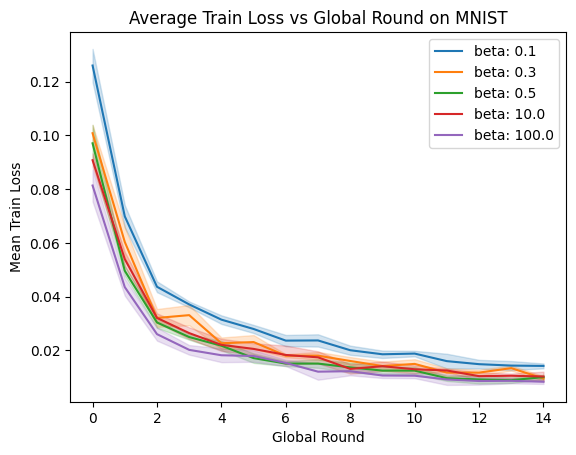

In [48]:
# from matplotlib import pyplot as plt
#
# mean_train_losses = np.mean(train_losses, axis=0)
# std_train_losses = np.std(train_losses, axis=0)
#
# plt.plot(mean_train_losses)
#
# # Plot the shaded area for the standard deviation
# plt.fill_between(
#     np.arange(mean_train_losses.shape[0]),
#     mean_train_losses - std_train_losses,
#     mean_train_losses + std_train_losses,
#     color='b', alpha=0.2
# )
#
# plt.title("Average Train Loss vs Global Round on MNIST")
# plt.xlabel('Global Round')
# plt.ylabel('Mean Train Loss')
#
# plt.show()

from matplotlib import pyplot as plt

mean_train_losses = np.mean(train_losses, axis=1)
std_train_losses = np.std(train_losses, axis=1)
print(mean_accuracy_scores.shape)

for i, beta in enumerate(betas):
    line, = plt.plot(mean_train_losses[i], label=f'beta: {beta}')
    color = line.get_color()
    # Plot the shaded area for the standard deviation
    plt.fill_between(
        np.arange(mean_train_losses.shape[1]),
        mean_train_losses[i] - std_train_losses[i],
        mean_train_losses[i] + std_train_losses[i],
        color=color, alpha=0.2
    )

plt.title("Average Train Loss vs Global Round on MNIST")
plt.xlabel('Global Round')
plt.ylabel('Mean Train Loss')
plt.legend()
plt.show()

(5, 15)


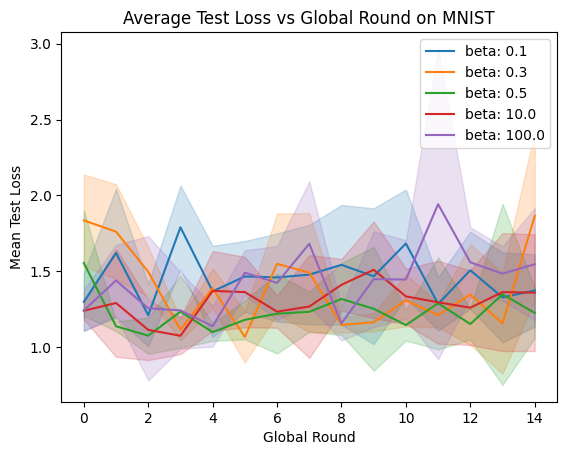

In [49]:
# from matplotlib import pyplot as plt
#
# mean_test_losses = np.mean(test_losses, axis=0)
# std_test_losses = np.std(test_losses, axis=0)
#
# plt.plot(mean_test_losses)
#
# # Plot the shaded area for the standard deviation
# plt.fill_between(
#     np.arange(mean_test_losses.shape[0]),
#     mean_test_losses - std_test_losses,
#     mean_test_losses + std_test_losses,
#     color='b', alpha=0.2
# )
#
# plt.title("Average test Loss vs Global Round on MNIST")
# plt.xlabel('Global Round')
# plt.ylabel('Mean test Loss')
#
# plt.show()


from matplotlib import pyplot as plt

mean_test_losses = np.mean(test_losses, axis=1)
std_test_losses = np.std(test_losses, axis=1)
print(mean_test_losses.shape)

for i, beta in enumerate(betas):
    line, = plt.plot(mean_test_losses[i], label=f'beta: {beta}')
    color = line.get_color()
    # Plot the shaded area for the standard deviation
    plt.fill_between(
        np.arange(mean_test_losses.shape[1]),
        mean_test_losses[i] - std_test_losses[i],
        mean_test_losses[i] + std_test_losses[i],
        color=color, alpha=0.2
    )

plt.title("Average Test Loss vs Global Round on MNIST")
plt.xlabel('Global Round')
plt.ylabel('Mean Test Loss')
plt.legend()
plt.show()

In [50]:
# Show final losses for all dirichlet distributions
for i, beta in enumerate(betas):
    print(mean_train_losses[i][-1], mean_test_losses[i][-1])

0.014241094702339618 1.37408763891318
0.00955719948048776 1.865668175103388
0.01008487335643408 1.2261843262071708
0.010297990477610026 1.3597917125434962
0.00835626537890296 1.546940066306062


In [1]:
class args:
    def __init__(self):
        self.num_channels = 1
        self.iid = 1
        self.num_classes = 10
        self.num_users = 10
        self.dataset = 'mnist'

In [10]:
from src.utils import get_dataset
import torch
import pickle
filepath = "C:\\Users\\LohithSai\\Desktop\\FederatedImputation\\TheArchive\\global_classifier_experiments\\run_one\\gen_dataset_100.0.pkl"
with open(filepath, 'rb') as f:
    gen_dataset = pickle.load(f)

train_dataset, test_dataset, user_groups = get_dataset(args())
real_dataset = torch.utils.data.ConcatDataset([train_dataset, test_dataset])

In [11]:
from torch.utils.data import DataLoader

testloader = DataLoader(gen_dataset, batch_size=32, shuffle=True)
# testloader = DataLoader(real_dataset, batch_size=32, shuffle=True)

In [12]:
import torch
from src.models import ExquisiteNetV1

model_path = "C:\\Users\\LohithSai\\Desktop\\FederatedImputation\\TheArchive\\global_classifier_experiments\\run_three\\classifier_global_0.1.pth"
model = torch.load(model_path)
# model.load_state_dict(torch.load(model_path))

In [13]:
from torch import nn
import torch.nn.functional as F
# Set the model to evaluation mode
model.eval()

# Move the model to the appropriate device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define the loss criterion
criterion = nn.CrossEntropyLoss()

# Lists to store predicted labels and maximum predicted values
max_predicted_values = []
outputs = []
# Evaluate the model
with torch.no_grad():
    test_loss = 0.0
    test_pred_labels = []
    test_actual_labels = []
    for data, target in testloader:
        # Move the input data to the same device as the model
        data, target = data.to(device), target.to(device)

        # Forward pass
        output = model(data)
        output = F.softmax(output, dim=1)
        # Calculate the loss
        loss = criterion(output, target)
        test_loss += loss.item() * data.size(0)
        all_outputs = torch.chunk(output, output.size(0), dim=0)
        # Store predicted labels
        for aout in all_outputs:
            test_pred_labels.append(aout.argmax(dim=1))

            # Store maximum predicted values
            max_predicted_values.append(torch.max(aout.cpu()).item())  # Move back to CPU for storage if needed
            outputs.append(aout)


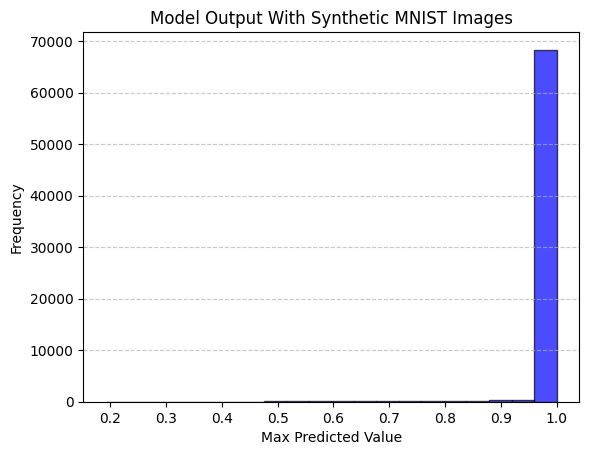

In [15]:
import matplotlib.pyplot as plt

# Plot histogram of max_predicted_values
plt.hist(max_predicted_values, bins=20, color='blue', alpha=0.7, edgecolor='black', range = (min(max_predicted_values), max(max_predicted_values)))
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add labels and title
plt.title('Model Output With Synthetic MNIST Images')
plt.xlabel('Max Predicted Value')
plt.ylabel('Frequency')

# Show plot
plt.show()


In [42]:
min(max_predicted_values)

0.11651069670915604

In [19]:
print(outputs[0][1])

tensor([1.9498e-06, 2.6102e-05, 8.6744e-10, 1.1632e-05, 1.2310e-06, 1.1715e-07,
        8.4878e-09, 6.9258e-11, 9.9996e-01, 1.5273e-07], device='cuda:0')


In [20]:
tensor_2d = torch.randn(5, 3)  # Replace this with your actual tensor

# Split the 2D tensor into x tensors of length y
tensors_split = torch.chunk(tensor_2d, tensor_2d.size(0), dim=0)

In [21]:
tensors_split

(tensor([[-0.3383, -0.5097, -0.7815]]),
 tensor([[-0.9147,  0.3224,  0.5689]]),
 tensor([[ 0.7226, -0.4737,  0.0520]]),
 tensor([[-0.3963, -0.2031,  0.3631]]),
 tensor([[ 0.9823,  0.0360, -0.5958]]))

In [8]:
from src.update import DatasetSplit
from src.utils import get_dataset
import numpy as np
import matplotlib.pyplot as plt
NUM_CLIENTS, NUM_LABELS = 5, 10
clients_labels = np.zeros((NUM_CLIENTS, NUM_LABELS))

class args:
    def __init__(self):
        self.num_channels = 1
        self.iid = 2
        self.num_classes = 10
        self.num_users = NUM_CLIENTS
        self.dataset = 'mnist'
        self.dirichlet = 0.1

dataset, _, user_groups = get_dataset(args())
idxs_users = np.random.choice(range(NUM_CLIENTS), NUM_CLIENTS, replace=False)
print(len(idxs_users))
for idx in idxs_users:
    idxs = user_groups[idx]
    train_dataset = DatasetSplit(dataset, idxs)
    labels = [t[1].item() for t in train_dataset]
    for label in labels:
        clients_labels[idx][label] += 1
    # plt.hist(labels, bins=20, color='skyblue', edgecolor='black')
    # plt.show()
clients_labels[0]

ModuleNotFoundError: No module named 'impute'

NameError: name 'NUM_LABELS' is not defined

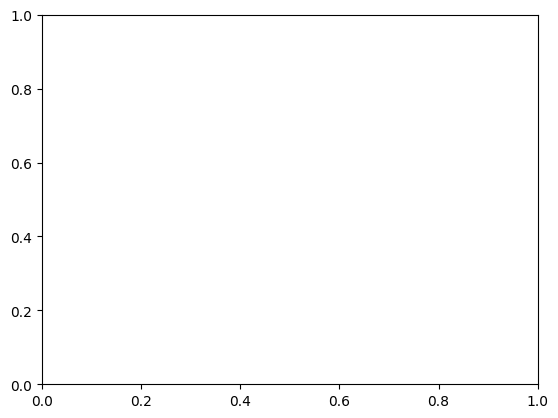

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting grouped bar chart
fig, ax = plt.subplots()
index = np.arange(NUM_LABELS)
bar_width = 0.1
opacity = 0.8

for i in range(NUM_CLIENTS):
    rects = ax.bar(index + i * bar_width, clients_labels[i], bar_width,
                    alpha=opacity,
                    label='Client {}'.format(i))

ax.set_xlabel('Labels')
ax.set_ylabel('Counts')
ax.set_title('Label Distribution per Client')
ax.set_xticks(index + bar_width * (NUM_CLIENTS - 1) / 2)
ax.set_xticklabels(index)
ax.legend()

plt.tight_layout()
plt.show()


[4, 3, 6, 4, 6, 3, 1, 8, 5, 7]